In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [20, 10]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

In [2]:
model = Schelling(width = 50, height = 50, density = 0.70, minority_pc = 0.4, homophily = 2,  policy = 'random', follow_policy=1)

/home/gmauro/RS-chelling/utils.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, "percent"] = df1["percent"] / total_percent


In [3]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

17


In [4]:
model_out = model.datacollector.get_model_vars_dataframe()

In [5]:
model_out

,perc_happy,segregation
0,0.829920,0.432736
1,0.928328,0.458902
2,0.960182,0.473549
3,0.975540,0.480660
4,0.982935,0.484499
5,0.989192,0.488908
6,0.993743,0.490757
7,0.996587,0.491610
8,0.997725,0.492321
9,0.998862,0.492463


(0.8299203640500569, 1.0)

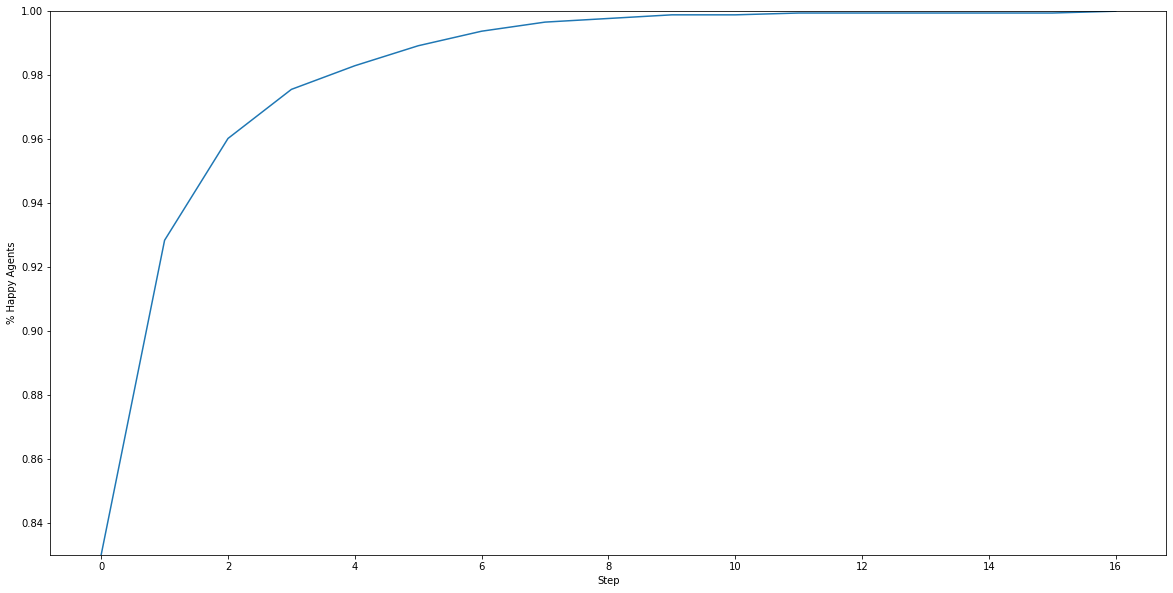

In [6]:
model_out.perc_happy.plot()
plt.xlabel("Step")
plt.ylabel("% Happy Agents")
plt.ylim(min(model_out.perc_happy),1)


Text(0, 0.5, '<S>')

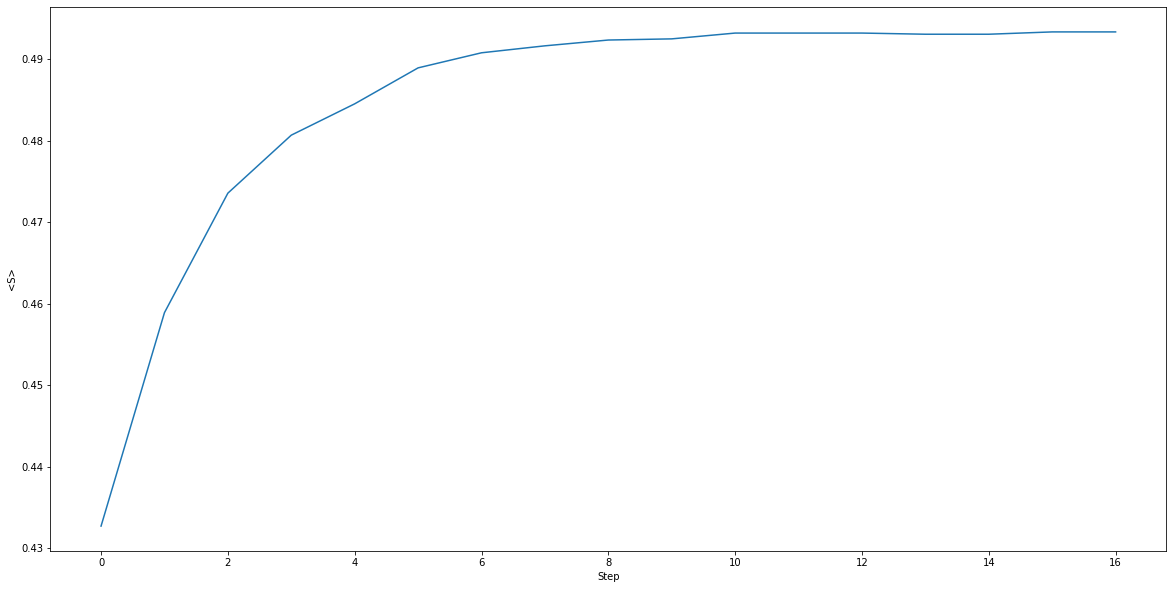

In [7]:
model_out.segregation.plot()
plt.xlabel("Step")
plt.ylabel("<S>")

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [8]:
from mesa import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [9]:
fixed_params = {
    'width': 50,
    'height': 50,
    'density': 0.70,
    'minority_pc': 0.4,
    'homophily': 2,
    'seed' :3110
}

#policies = ["random", "distance", "relevance", "distance_relevance", "rich_neighborhood", "poor_neighborhood", "minimum_improvement", "maximum_improvement", "recently_emptied", "historically_emptied" ]

policies = ["random", "distance", "relevance", "rich_neighborhood", "poor_neighborhood", "minimum_improvement", "maximum_improvement", "recently_emptied", "empty_surrounded" ]

percentages = [i / 10 for i in range(1,11)]

variable_parms = {"policy": policies, "follow_policy": percentages}

merged_params = {**fixed_params, **variable_parms}
merged_params 

{'width': 50,
 'height': 50,
 'density': 0.7,
 'minority_pc': 0.4,
 'homophily': 2,
 'seed': 3110,
 'policy': ['random',
  'distance',
  'relevance',
  'rich_neighborhood',
  'poor_neighborhood',
  'minimum_improvement',
  'maximum_improvement',
  'recently_emptied',
  'empty_surrounded'],
 'follow_policy': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [10]:
pd.options.mode.chained_assignment = None

results = batch_run(
    Schelling,
    parameters = merged_params,
    iterations=100,
    max_steps=100,
    number_processes = None
);

results_df = pd.DataFrame(results)


  0%|          | 0/9000 [00:00<?, ?it/s]

In [11]:
results_df.to_csv("results.csv", index=False)
results_df = pd.read_csv("results.csv")

In [12]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation"]]
results_df

,RunId,iteration,Step,follow_policy,policy,segregation
0,1,0,12,0.2,random,0.470622
1,3,0,12,0.4,random,0.470622
2,4,0,12,0.5,random,0.470622
3,6,0,12,0.7,random,0.470622
4,0,0,12,0.1,random,0.470622
...,...,...,...,...,...,...
8995,8995,99,13,0.6,empty_surrounded,0.475374
8996,8996,99,11,0.7,empty_surrounded,0.467598
8997,8999,99,11,1.0,empty_surrounded,0.453341
8998,8997,99,15,0.8,empty_surrounded,0.466158


In [13]:
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'follow_policy']).mean().reset_index()
results_df_g.head(20)

,policy,follow_policy,RunId,iteration,Step,segregation
0,distance,0.1,4465.0,49.5,16.0,0.464142
1,distance,0.2,4466.0,49.5,12.0,0.469182
2,distance,0.3,4467.0,49.5,11.0,0.462558
3,distance,0.4,4468.0,49.5,10.0,0.463854
4,distance,0.5,4469.0,49.5,14.0,0.460974
5,distance,0.6,4470.0,49.5,16.0,0.469614
6,distance,0.7,4471.0,49.5,12.0,0.459677
7,distance,0.8,4472.0,49.5,15.0,0.467742
8,distance,0.9,4473.0,49.5,13.0,0.457229
9,distance,1.0,4474.0,49.5,16.0,0.455357


In [14]:
#per each policy, extract the timeseries of Step and segregation
results_df_g_step = results_df_g.pivot(index='follow_policy', columns='policy', values='Step')
results_df_g_segregation = results_df_g.pivot(index='follow_policy', columns='policy', values='segregation')



In [15]:
results_df_g_step

policy,distance,empty_surrounded,maximum_improvement,minimum_improvement,poor_neighborhood,random,recently_emptied,relevance,rich_neighborhood
follow_policy,,,,,,,,,
0.1,16.0,10.0,9.0,10.0,22.44,12.0,11.0,11.0,11.13
0.2,12.0,12.0,11.0,10.0,24.13,12.0,12.0,11.0,10.52
0.3,11.0,15.0,11.0,10.0,25.98,12.0,17.0,8.0,10.29
0.4,10.0,8.0,11.0,12.0,27.85,12.0,9.0,10.0,10.04
0.5,14.0,10.0,6.0,8.0,28.84,12.0,14.0,13.0,9.84
0.6,16.0,13.0,13.0,8.0,29.37,12.0,9.0,10.0,9.20
0.7,12.0,11.0,7.0,6.0,31.69,12.0,10.0,12.0,8.96
0.8,15.0,15.0,10.0,5.0,30.08,12.0,12.0,9.0,8.61
0.9,13.0,10.0,5.0,5.0,30.40,12.0,10.0,13.0,8.21


Text(0, 0.5, 'nr. steps')

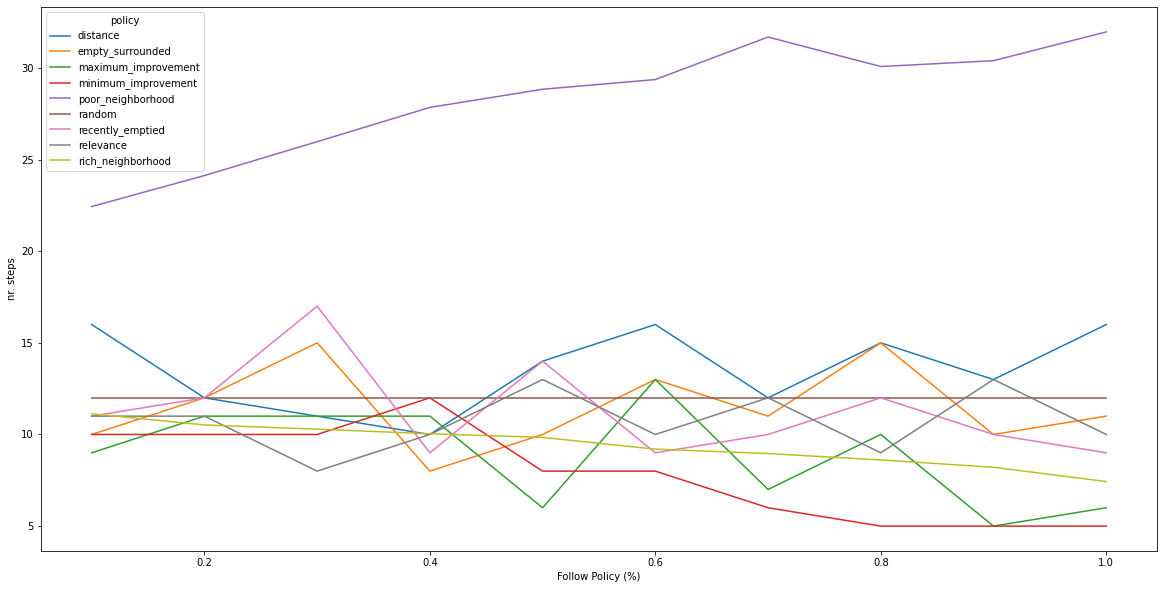

In [16]:
#plot the timeseries of Step
results_df_g_step.plot()
plt.xlabel("Follow Policy (%)")
plt.ylabel("nr. steps")

Text(0, 0.5, '<S>')

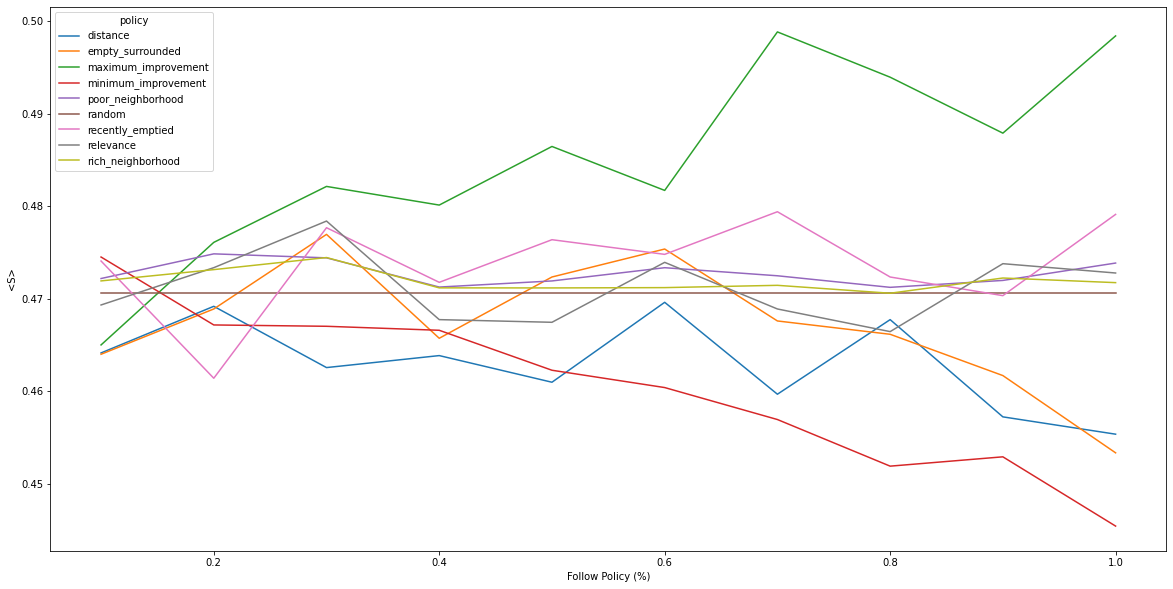

In [17]:
#plot the timeseries of Step
results_df_g_segregation.plot()
plt.xlabel("Follow Policy (%)")
plt.ylabel("<S>")

In [18]:
#in results_df_g_std, calculate both the standard deviation and the mean of Step and segregation, across different iteration and policy

results_df_g_std = results_df.groupby(['policy', 'follow_policy']).agg({'Step': ['std', 'mean'], 'segregation': ['std', 'mean']}).reset_index()
results_df_g_std.columns = results_df_g_std.columns.droplevel(0)
results_df_g_std.columns = ['policy', 'follow_policy', 'Step_std', 'Step_mean', 'segregation_std', 'segregation_mean']
results_df_g_std.head(20)

,policy,follow_policy,Step_std,Step_mean,segregation_std,segregation_mean
0,distance,0.1,0.0,16.0,0.0,0.464142
1,distance,0.2,0.0,12.0,0.0,0.469182
2,distance,0.3,0.0,11.0,0.0,0.462558
3,distance,0.4,0.0,10.0,0.0,0.463854
4,distance,0.5,0.0,14.0,0.0,0.460974
5,distance,0.6,0.0,16.0,0.0,0.469614
6,distance,0.7,0.0,12.0,0.0,0.459677
7,distance,0.8,0.0,15.0,0.0,0.467742
8,distance,0.9,0.0,13.0,0.0,0.457229
9,distance,1.0,0.0,16.0,0.0,0.455357


In [19]:
#pivot the table, so that we have the standard deviation and the mean of Step and segregation, per each policy
results_df_g_std_step = results_df_g_std.pivot(index='follow_policy', columns='policy', values='Step_std')
results_df_g_std_segregation = results_df_g_std.pivot(index='follow_policy', columns='policy', values='segregation_std')

results_df_g_mean_step = results_df_g_std.pivot(index='follow_policy', columns='policy', values='Step_mean')
results_df_g_mean_segregation = results_df_g_std.pivot(index='follow_policy', columns='policy', values='segregation_mean')



In [20]:
results_df_g_std_step

policy,distance,empty_surrounded,maximum_improvement,minimum_improvement,poor_neighborhood,random,recently_emptied,relevance,rich_neighborhood
follow_policy,,,,,,,,,
0.1,0.0,0.0,0.0,0.0,13.874852,0.0,0.0,0.0,2.342644
0.2,0.0,0.0,0.0,0.0,8.483680,0.0,0.0,0.0,2.439076
0.3,0.0,0.0,0.0,0.0,9.490005,0.0,0.0,0.0,2.075811
0.4,0.0,0.0,0.0,0.0,8.953725,0.0,0.0,0.0,2.597279
0.5,0.0,0.0,0.0,0.0,9.309190,0.0,0.0,0.0,2.355822
0.6,0.0,0.0,0.0,0.0,10.408480,0.0,0.0,0.0,2.160247
0.7,0.0,0.0,0.0,0.0,10.362807,0.0,0.0,0.0,2.546219
0.8,0.0,0.0,0.0,0.0,10.301201,0.0,0.0,0.0,2.291376
0.9,0.0,0.0,0.0,0.0,9.310578,0.0,0.0,0.0,2.109598


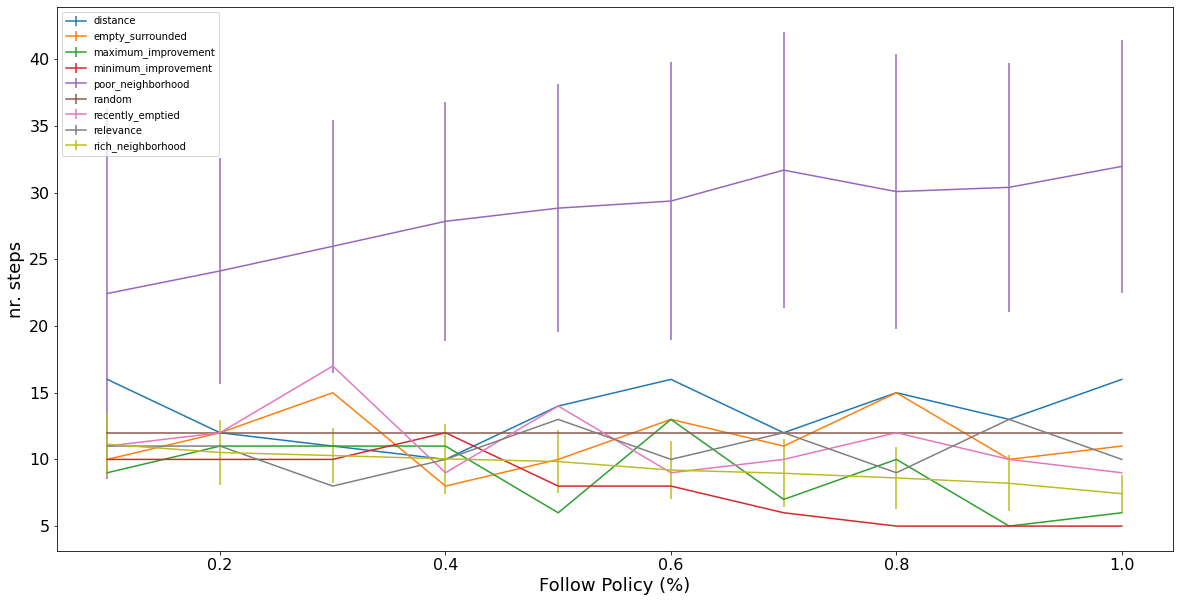

In [21]:
#join all the columns of the dataframe, so that we have the standard deviation and the mean of Step and segregation, per each policy, with different colors
for column in results_df_g_std_step.columns:
    plt.errorbar(results_df_g_mean_step.index, results_df_g_mean_step[column], yerr=results_df_g_std_step[column], label=column)

plt.xlabel("Follow Policy (%)", fontsize=18)
plt.ylabel("nr. steps", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left')
plt.show()
    